# Netflix Case Study

Analyzing the given Netflix dataset, I'd like to explicitly answer the following questions:

1. Find the counts of each categorical variable both using graphical and non graphical analysis.


> a. For Non-graphical Analysis.


> b. For graphical analysis.


---

2. Comparison of tv shows vs. movies.


> a. Number of TV shows vs Movies in Netflix


> b. Trend of the number of TV Shows and Movies Released by Year.

  
> c. Find the number of movies produced in each country and pick the top 10 countries.


> d. Find the number of TV-Shows produced in each country and pick the top 10 countries.


---


3. What is the best time to launch a TV show?


> a. Find which is the best week to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies.


> b. Find which is the best month to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies.


> c. Netflix content added over years.


---


4. Analysis of actors/directors of different types of shows/movies.


> a. Identify the top 10 directors who have appeared in most movies or TV shows.


> b. Identify the top 10 directors who have appeared in most movies or TV shows.


---


5. Which genre movies are more popular or produced more?


> a. Word cloud for the genre column.


> b. Identify the top 5 generes.


> c. Top 5 Genre popularity over years


---


6. Find After how many days the movie will be added to Netflix after the release of the movie (you can consider the recent past data).


---

7. Rating of TV shows and movies in Netflix.


---


8. Sentiment analysis of Netflix content.

---

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# get the dataset (csv file) from the link

!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

--2023-12-19 21:56:53--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 99.84.178.93, 99.84.178.226, 99.84.178.172, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|99.84.178.93|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3399671 (3.2M) [text/plain]
Saving to: ‘netflix.csv’

netflix.csv         100%[===================>]   3.24M  --.-KB/s    in 0.09s   

2023-12-19 21:56:54 (37.7 MB/s) - ‘netflix.csv’ saved [3399671/3399671]



## General analysis

In [30]:
# read the csv file

df=pd.read_csv("netflix.csv")

In [31]:
df.shape

(8807, 12)

**Insights/Conclusion:** Dataset has 8807 rows and 12 columns.

In [32]:
# First 5 rows of the dataset

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [33]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [35]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

**Insights/Conclusion:**
*   All columns are of object (string) datatype except `release year` which is of int datatype.
*   There are a lot of null values in the `director`, `cast` and `country` columns.
*   `date_added` has 10 null values, `rating` has 4 null values and `duration` has 3 null values.
*   Rest all columns doesn't contain any missing/null value.

In [36]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


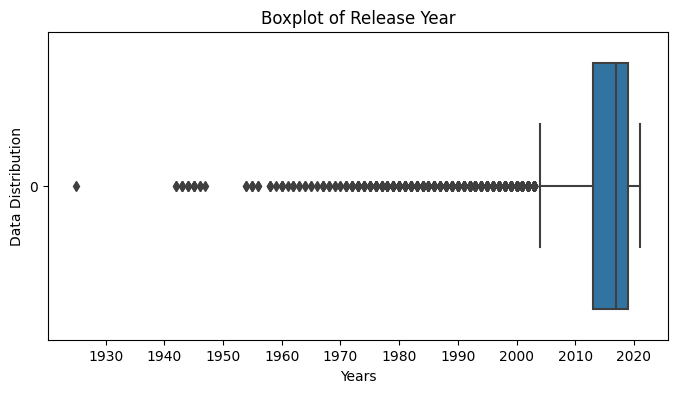

In [37]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df['release_year'], orient='h')

plt.title('Boxplot of Release Year')
plt.ylabel('Data Distribution')
plt.xlabel('Years')

plt.xticks(range(int(df['release_year'].min())+5, int(df['release_year'].max()) + 1, 10))
plt.show()

**Insights/Conclusion:** The dataset spans movies and shows released from 1925 to 2021, with a mean release year of around 2014. The majority fall within 2013 to 2019, as indicated by the interquartile range. The distribution leans toward more recent years, with 2017 marking the median release year.

## Data Cleaning

In [38]:
# Data Cleaning

# Filling missing values in 'director', 'cast', 'country', 'rating' and 'duration' columns.
df['director'].fillna('Unknown director', inplace=True)
df['cast'].fillna('Unknown cast', inplace=True)
df['country'].fillna('Unknown country', inplace=True)
df['rating'].fillna('Unknown rating', inplace=True)
df['duration'].fillna('Unknown duration', inplace=True)

# Dropping rows with missing 'date_added' as if we fill it with Unknown value it will create an issue while converting the column into datetime type.
df.dropna(subset=['date_added'], inplace=True)

# Converting the 'date_added' into proper datetime format for easy computation in further analysis.
df['date_added'] = df['date_added'].apply(lambda x: pd.to_datetime(x.strip()))

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8797 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8797 non-null   object        
 1   type          8797 non-null   object        
 2   title         8797 non-null   object        
 3   director      8797 non-null   object        
 4   cast          8797 non-null   object        
 5   country       8797 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8797 non-null   int64         
 8   rating        8797 non-null   object        
 9   duration      8797 non-null   object        
 10  listed_in     8797 non-null   object        
 11  description   8797 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 893.4+ KB


**Insights/Conclusion:** Now we have 8797 non-null rows for further analysis.

In [40]:
# Unnesting 'director', 'cast' and 'country' columns
netflix = df.copy()     # hard copy (so we we do further analysis on df, if should not affect netflix)
netflix['director'] = netflix['director'].str.split(',')
netflix['cast'] = netflix['cast'].str.split(',')
netflix['country'] = netflix['country'].str.split(',')

In [41]:
netflix = netflix.explode('director').explode('cast').explode('country')
netflix.shape

(89346, 12)

In [42]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown director,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown director,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


Due to unnesting number of rows increased exponentially. Now, let's explore the dataset.

## Counts of all categorical variables.

In [ ]:
# value_counts() --> Return a Series containing counts of unique values.
# nunique() --> Count number of distinct elements in specified axis.
# unique() --> Return unique values based on a hash table.

In [43]:
columns = netflix.columns
columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

**Non-graphical Analysis**

In [44]:
for col in columns:
  print(f'Number of unique values in {col}:',netflix[col].nunique())
# This will print the number of unique values in each column

Number of unique values in show_id: 8797
Number of unique values in type: 2
Number of unique values in title: 8797
Number of unique values in director: 5121
Number of unique values in cast: 39261
Number of unique values in country: 198
Number of unique values in date_added: 1714
Number of unique values in release_year: 74
Number of unique values in rating: 18
Number of unique values in duration: 221
Number of unique values in listed_in: 513
Number of unique values in description: 8765


**Graphical Analysis**

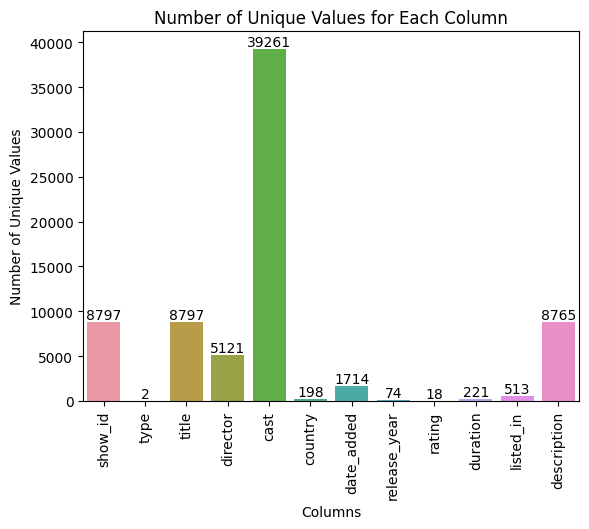

In [45]:
# Calculate the number of unique values for each column
unique_counts = netflix.nunique()

# Plot the results using Seaborn
ax = sns.barplot(x=unique_counts.index, y=unique_counts.values)
ax.bar_label(ax.containers[0], fontsize=10)
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.title('Number of Unique Values for Each Column')
plt.xticks(rotation=90)
plt.show()

**Insights/Conclusion:** The dataset contains 8797 unique show IDs and titles, indicating a one-to-one relationship. There are 5121 directors, 39261 cast members and diverse content from 198 countries. The variability in date_added spans 1714 entries, showcasing content added over 74 years with 18 different ratings and 513 listed genres, described across 8765 unique descriptions.

## Comparison of tv shows vs movies

**Number of TV shows vs Movies in Netflix**

In [46]:
netflix.groupby('type')['title'].nunique()

type
Movie      6131
TV Show    2666
Name: title, dtype: int64

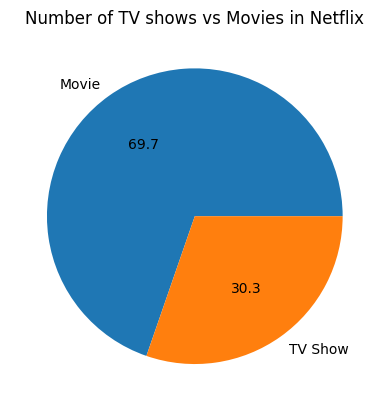

In [47]:
# Graphical Representation

plt.pie(x=netflix.groupby('type')['title'].nunique(), labels=netflix.groupby('type')['title'].nunique().index, autopct="%0.1f")
plt.title('Number of TV shows vs Movies in Netflix')
plt.show()

**Insights/Conclusion:**
On Netflix, movies constitute 69.7% of the content, towering over TV shows (30.3%). This dominance underscores the platform's rich array of films, showcasing a vast collection for varied audience preferences.

**Trend of the number of TV Shows and Movies Released by Year.**

In [24]:
# Let's divide the dataset into two parts one for movies and other for tv shows

In [48]:
netflix['country'] = netflix['country'].str.strip().str.lower()
movie = netflix[netflix['type'] == 'Movie'].copy()
tv_show = netflix[netflix['type'] == 'TV Show'].copy()

In [49]:
movie.shape

(65379, 12)

In [50]:
movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,united states,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,unknown country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Kimiko Glenn,unknown country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,James Marsden,unknown country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Sofia Carson,unknown country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [51]:
tv_show.shape

(23967, 12)

In [52]:
tv_show.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,south africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown director,Khosi Ngema,south africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown director,Gail Mabalane,south africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown director,Thabang Molaba,south africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown director,Dillon Windvogel,south africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


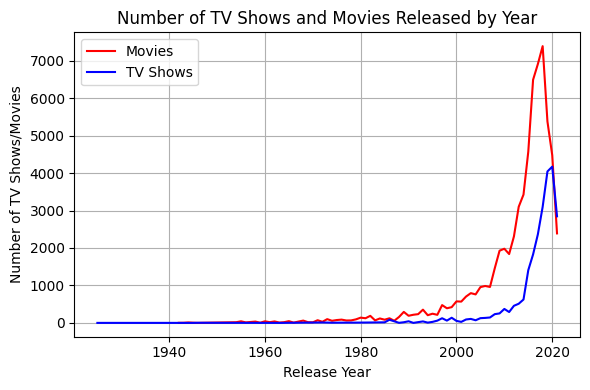

In [54]:
# Count the number of movies and TV shows in each year
movie_counts = movie['release_year'].value_counts().sort_index()
tv_show_counts = tv_show['release_year'].value_counts().sort_index()

plt.figure(figsize=(6, 4))

plt.plot(movie_counts.index, movie_counts.values , linestyle='-', color='r')
plt.plot(tv_show_counts.index, tv_show_counts.values, linestyle='-', color='b')

plt.xlabel('Release Year')
plt.ylabel('Number of TV Shows/Movies')
plt.title('Number of TV Shows and Movies Released by Year')
plt.grid(True)

# Adjust layout
plt.legend(loc='upper left', labels=['Movies', 'TV Shows'])
plt.tight_layout()
plt.show()

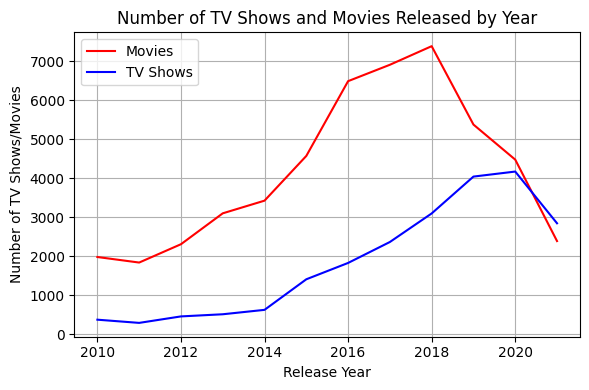

In [55]:
# Count the number of movies and TV shows in each year (year>=2010)

movie_counts = movie[movie['release_year']>=2010]['release_year'].value_counts().sort_index()
tv_show_counts = tv_show[tv_show['release_year']>=2010]['release_year'].value_counts().sort_index()

plt.figure(figsize=(6, 4))

plt.plot(movie_counts.index, movie_counts.values , linestyle='-', color='r')
plt.plot(tv_show_counts.index, tv_show_counts.values, linestyle='-', color='b')

plt.xlabel('Release Year')
plt.ylabel('Number of TV Shows/Movies')
plt.title('Number of TV Shows and Movies Released by Year')
plt.grid(True)

# Adjust layout
plt.legend(loc='upper left', labels=['Movies', 'TV Shows'])
plt.tight_layout()
plt.show()

**Insights/Conclusion:** The visualization depicts Netflix's content production growth, notably rising post-2000. A pinnacle in 2018 suggests robust output, followed by a potential decline, possibly attributed to data gaps or the pandemic. This showcases Netflix's substantial impact, evolving into a key content provider with diverse offerings, shaping digital entertainment trends.

**Find the number of movies produced in each country and pick the top 10 countries.**

In [56]:
top_10_countries_movies = movie[movie['country'] != 'unknown country'].groupby('country')['title'].nunique().sort_values(ascending=False).head(10).reset_index(name='movies')
top_10_countries_movies

,country,movies
0,united states,2752
1,india,962
2,united kingdom,534
3,canada,319
4,france,303
5,germany,182
6,spain,171
7,japan,119
8,china,114
9,mexico,111


**Find the number of TV-Shows produced in each country and pick the top 10 countries.**

In [57]:
top_10_countries_tv_shows = tv_show[tv_show['country'] != 'unknown country'].groupby('country')['title'].nunique().sort_values(ascending=False).head(10).reset_index(name='tv_shows')
top_10_countries_tv_shows

,country,tv_shows
0,united states,932
1,united kingdom,271
2,japan,198
3,south korea,170
4,canada,126
5,france,90
6,india,84
7,taiwan,70
8,australia,65
9,spain,61


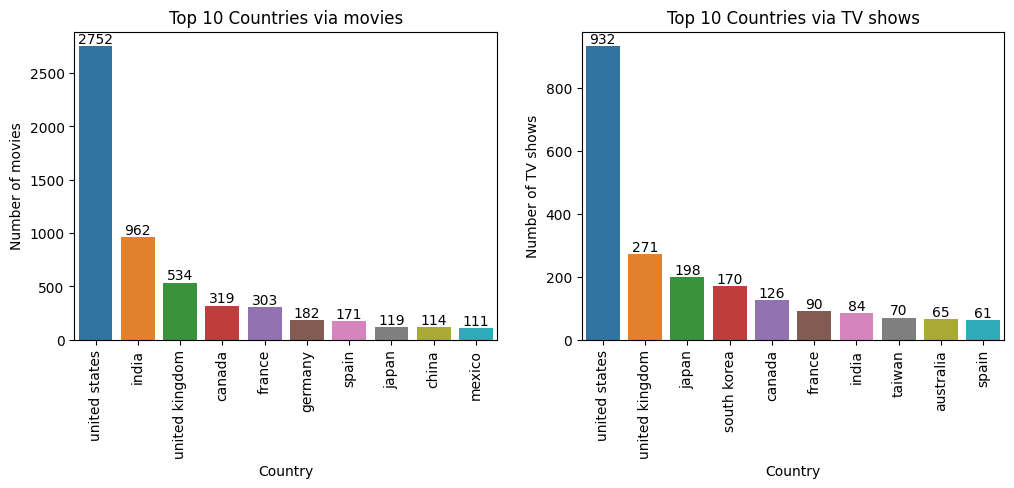

In [58]:
# Graphical Representation

fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

# Plot DataFrame 1 in the first subplot
sns.barplot(x='country', y='movies', data=top_10_countries_movies, ax=axes[0])
axes[0].set_title('Top 10 Countries via movies')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Number of movies')
axes[0].bar_label(axes[0].containers[0], fontsize=10)
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=90)

# Plot DataFrame 2 in the second subplot
sns.barplot(x='country', y='tv_shows', data=top_10_countries_tv_shows, ax=axes[1])
axes[1].set_title('Top 10 Countries via TV shows')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Number of TV shows')
axes[1].bar_label(axes[1].containers[0], fontsize=10)
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=90)

# Show the plot
plt.show()

**Insights/Conclusion:** The United States leads in movies (2752) and TV shows, showcasing its substantial contribution to both formats. The UK, India, Canada, France, Japan and South korea also hold significant positions, demonstrating their influence on Netflix's global content library.

## What is the best time to launch a TV show/movie?

In [ ]:
# For TV show

In [59]:
tv_show.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,south africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown director,Khosi Ngema,south africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown director,Gail Mabalane,south africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown director,Thabang Molaba,south africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown director,Dillon Windvogel,south africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [60]:
# Extract the week number and month from the 'date_added' column
tv_show['week_launched'] = tv_show['date_added'].dt.strftime('%U')
tv_show['month_launched'] = tv_show['date_added'].dt.strftime('%m')
tv_show.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,week_launched,month_launched
1,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,south africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",38,09
1,s2,TV Show,Blood & Water,Unknown director,Khosi Ngema,south africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",38,09
1,s2,TV Show,Blood & Water,Unknown director,Gail Mabalane,south africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",38,09
1,s2,TV Show,Blood & Water,Unknown director,Thabang Molaba,south africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",38,09
1,s2,TV Show,Blood & Water,Unknown director,Dillon Windvogel,south africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",38,09


In [ ]:
# For Movies

In [61]:
movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,united states,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,unknown country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Kimiko Glenn,unknown country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,James Marsden,unknown country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Sofia Carson,unknown country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...


In [62]:
# Extract the week number and month from the 'date_added' column
movie['week_launched'] = movie['date_added'].dt.strftime('%U')
movie['month_launched'] = movie['date_added'].dt.strftime('%m')
movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,week_launched,month_launched
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,united states,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",38,09
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,unknown country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,38,09
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Kimiko Glenn,unknown country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,38,09
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,James Marsden,unknown country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,38,09
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Sofia Carson,unknown country,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,38,09


**Find which is the best week to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies.**


In [63]:
# Group by week and count the total number of TV shows for each week
tv_shows_by_week = tv_show.groupby('week_launched')['title'].nunique().sort_values(ascending=False).head(5).reset_index(name='tv_shows_count')
tv_shows_by_week

,week_launched,tv_shows_count
0,39,94
1,31,86
2,26,84
3,13,83
4,27,82


In [64]:
# Group by week and count the total number of Movies for each week
movies_by_week = movie.groupby('week_launched')['title'].nunique().sort_values(ascending=False).head(5).reset_index(name='movies_count')
movies_by_week

,week_launched,movies_count
0,00,251
1,39,241
2,26,234
3,13,231
4,43,204


**Insights/Conclusion:** Week 39 stands out for both TV shows (94) and movies (241), indicating it as the optimal release window. Week 26 also proves strong for TV shows (84) and movies (234). This demonstrates consistent high viewership potential, making them the prime choice for launching either TV shows or movies.

**Find which is the best month to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies.**

In [65]:
# Group by month and count the total number of TV shows for each month
tv_shows_by_month = tv_show.groupby('month_launched')['title'].nunique().sort_values(ascending=False).head(5).reset_index(name='tv_shows_count')
tv_shows_by_month

,month_launched,tv_shows_count
0,12,266
1,07,262
2,09,251
3,06,236
4,08,236


In [66]:
# Group by month and count the total number of Movies for each month
movies_by_month = movie.groupby('month_launched')['title'].nunique().sort_values(ascending=False).head(5).reset_index(name='movies_count')
movies_by_month

,month_launched,movies_count
0,07,565
1,04,550
2,12,547
3,01,546
4,10,545


**Insights/Conclusion:** The data suggests that July is favorable for both TV shows (262) and movies (565), exhibiting high counts. December also proves strong for TV shows (266) and movies (547). These months likely attract more audience engagement, making them optimal periods for releasing both TV shows and movies due to heightened viewer interest.

**Netflix content added over years**

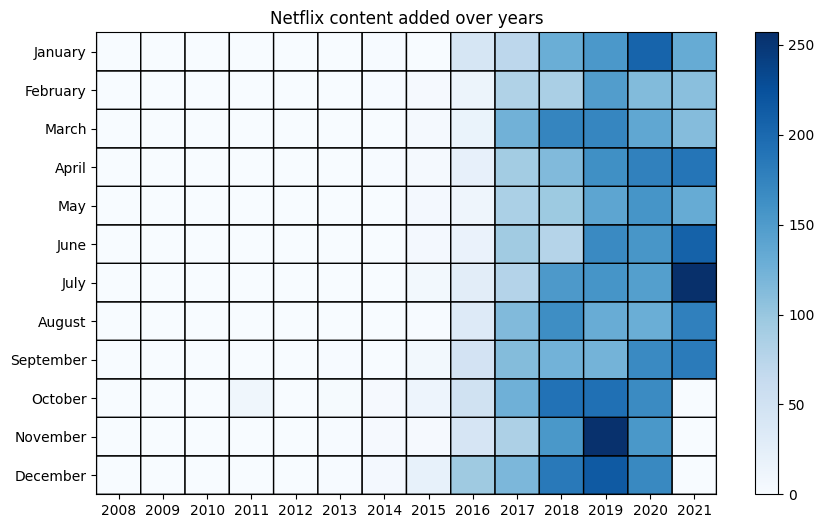

In [107]:
df_date = df[['date_added']].dropna()
df_date['year'] = df_date['date_added'].dt.year
df_date['month'] = df_date['date_added'].dt.strftime('%B')
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df_new = df_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T

plt.figure(figsize=(10,6))
plt.pcolor(df_new,cmap='Blues',edgecolors='black',linewidths=1)

plt.xticks(np.arange(0.5,len(df_new.columns),1),df_new.columns)
plt.yticks(np.arange(0.5,len(df_new.index),1),df_new.index)
plt.title('Netflix content added over years')

cbar = plt.colorbar()
plt.show()

**Insights/Conclusion:** Starting from 2016, the app experiences a steady rise in the movie count. July 2021 witnessed the highest influx of new movies, closely followed by November 2019. This pattern reflects a consistent growth trend in movie additions to the app, particularly highlighting notable surges in these specific months.

## Analysis of actors/directors of different types of shows/movies.

**Identify the top 10 actors who have appeared in most movies or TV shows.**


In [67]:
# Top 10 actors in TV shows/movies
top_10_actors = netflix[netflix['cast'] != 'Unknown cast'].groupby('cast')['title'].nunique().nlargest(10)
print("Top 10 actors in TV shows/movies:")
print(top_10_actors)

Top 10 actors in TV shows/movies:
cast
 Anupam Kher         39
 Rupa Bhimani        31
 Takahiro Sakurai    30
 Julie Tejwani       28
 Om Puri             27
 Rajesh Kava         26
Shah Rukh Khan       26
 Andrea Libman       25
 Boman Irani         25
 Paresh Rawal        25
Name: title, dtype: int64


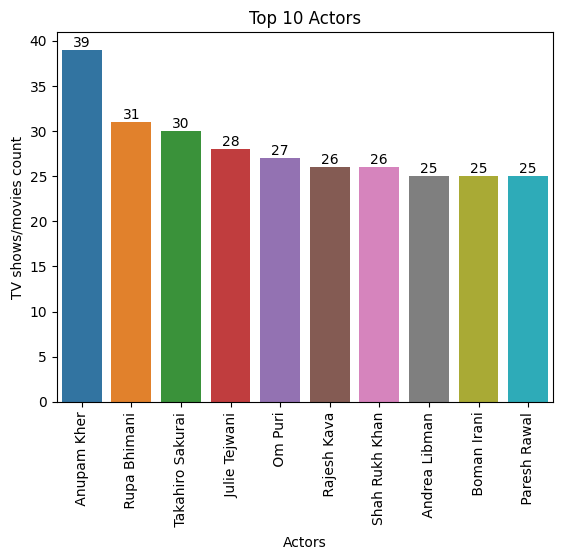

In [68]:
# Graphical representation using Seaborn
ax = sns.barplot(x=top_10_actors.index, y=top_10_actors.values)
ax.bar_label(ax.containers[0], fontsize=10)
plt.xlabel('Actors')
plt.ylabel('TV shows/movies count')
plt.title('Top 10 Actors')
plt.xticks(rotation=90)
plt.show()

**Insights/Conclusion:** The top 10 actors appearing in movies or TV shows on Netflix display a mix of international talent. Anupam Kher leads with 39 appearances, followed closely by Rupa Bhimani and Takahiro Sakurai. This diverse list includes renowned actors like Shah Rukh Khan, Om Puri, and Paresh Rawal, indicating a blend of both global and regional stars contributing significantly to Netflix content across genres and languages.

**Identify the top 10 directors who have directed the most movies or TV shows.**

In [69]:
# Top 10 directors in TV shows/movies
top_10_directors = netflix[netflix['director'] != 'Unknown director'].groupby('director')['title'].nunique().nlargest(10)
print("Top 10 directors in TV shows/movies:")
print(top_10_directors)

Top 10 directors in TV shows/movies:
director
Rajiv Chilaka          22
 Jan Suter             18
Raúl Campos            18
Marcus Raboy           16
Suhas Kadav            16
Jay Karas              15
Cathy Garcia-Molina    13
Jay Chapman            12
Martin Scorsese        12
Youssef Chahine        12
Name: title, dtype: int64


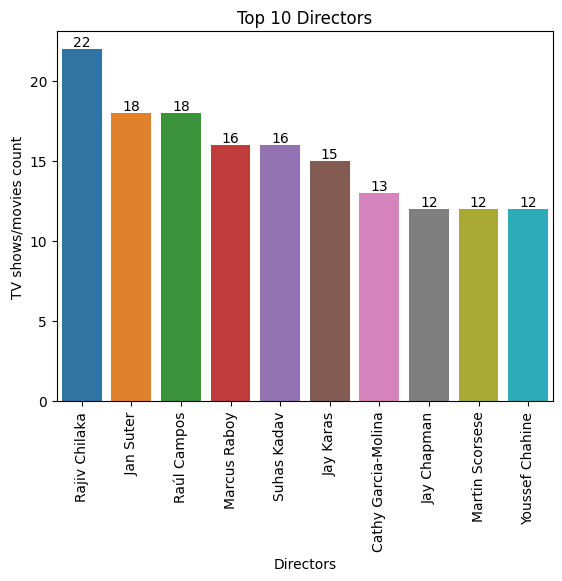

In [70]:
# Graphical representation using Seaborn
ax = sns.barplot(x=top_10_directors.index, y=top_10_directors.values)
ax.bar_label(ax.containers[0], fontsize=10)
plt.xlabel('Directors')
plt.ylabel('TV shows/movies count')
plt.title('Top 10 Directors')
plt.xticks(rotation=90)
plt.show()

**Insights/Conclusion:** The top 10 directors with the highest number of movies or TV shows on Netflix reflect a diverse range of talent. Rajiv Chilaka leads with 22 directorial credits, followed by Jan Suter and Raúl Campos with 18 each. Notably, acclaimed filmmakers like Martin Scorsese and Youssef Chahine are among the list, showcasing a blend of prolific directors from varied backgrounds contributing significantly to Netflix's extensive library across genres and styles.

## Which genre movies are more popular or produced more?

**Word cloud for the genre column.**

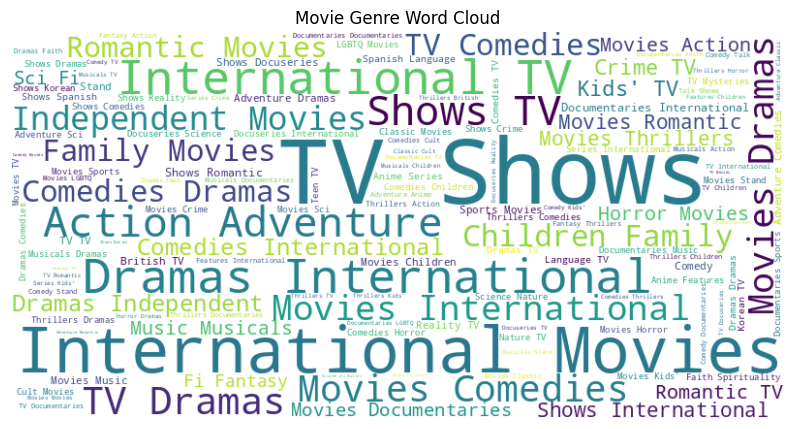

In [71]:
from wordcloud import WordCloud

# Creating a word cloud for movie genres
genre_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['listed_in']))

# The 'df' dataset is used instead of 'netflix' due to unique 'listed_in' values for all titles.
# Unnesting in 'netflix' causes duplicacy in the 'listed_in' column.

plt.figure(figsize=(10, 8))
plt.imshow(genre_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Movie Genre Word Cloud')
plt.show()


**Insights/Conclusion:** In the word cloud of genres, "International movies" and "TV shows" stands out as the most prevalent, suggesting a significant focus or production volume in this category. The prominence of "International TV" and "Dramas" reflects strong viewer interest, while "Action adventure" and "Comedies" also indicate considerable popularity and production attention in Netflix's content repertoire.

**Identify the top 5 generes.**

In [72]:
# Top 5 generes count

genre_counts = df[['title','listed_in']]
genre_counts['listed_in'] = genre_counts['listed_in'].str.split(', ')

genre_counts = genre_counts.explode('listed_in')
genre_counts.head()

<ipython-input-72-3680767d5387>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_counts['listed_in'] = genre_counts['listed_in'].str.split(', ')


,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
1,Blood & Water,TV Dramas
1,Blood & Water,TV Mysteries
2,Ganglands,Crime TV Shows


In [73]:
top_5_genres = genre_counts.groupby('listed_in')['title'].nunique().nlargest(5)
print("Top 5 most popular genres:", top_5_genres)

Top 5 most popular genres: listed_in
International Movies      2752
Dramas                    2427
Comedies                  1674
International TV Shows    1350
Documentaries              869
Name: title, dtype: int64


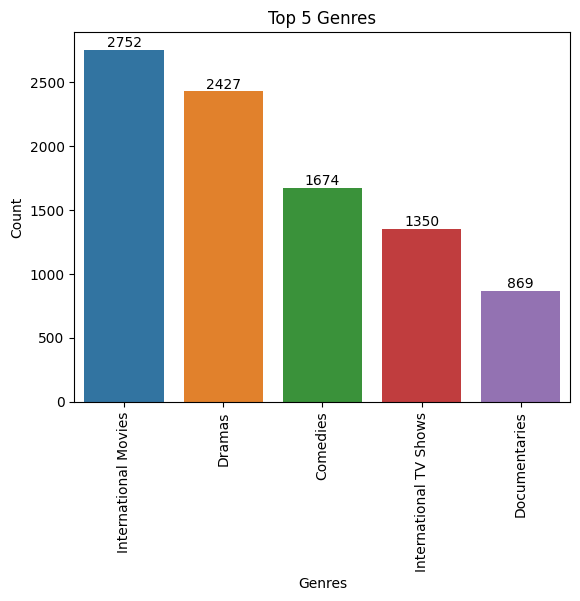

In [74]:
# Graphical representation using Seaborn
ax = sns.barplot(x=top_5_genres.index, y=top_5_genres.values)
ax.bar_label(ax.containers[0], fontsize=10)
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Top 5 Genres')
plt.xticks(rotation=90)
plt.show()

**Insights/Conclusion:** The top five most popular genres on Netflix reveal a preference for diverse content. "International Movies" lead the catalog, followed closely by "Dramas" and "Comedies," showcasing a penchant for varied narratives. Additionally, "International TV Shows" and "Documentaries" indicate a growing interest in global series and informative content, reflecting a broad viewership seeking varied entertainment and cultural experiences.

**Top 5 Genre popularity over years**

In [75]:
genre_df = df[['title','release_year','listed_in']]
genre_df['listed_in'] = genre_df['listed_in'].str.split(', ')
genre_df = genre_df.explode('listed_in')

genre_df = genre_df[genre_df['release_year']>=2010]
genre_df.head()

<ipython-input-75-bb20ae7ca76d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_df['listed_in'] = genre_df['listed_in'].str.split(', ')


,title,release_year,listed_in
0,Dick Johnson Is Dead,2020,Documentaries
1,Blood & Water,2021,International TV Shows
1,Blood & Water,2021,TV Dramas
1,Blood & Water,2021,TV Mysteries
2,Ganglands,2021,Crime TV Shows


In [76]:
top_genre = top_5_genres.index

In [77]:
genre_df = genre_df[genre_df['listed_in'].isin(top_genre)]
genre_df.head()

,title,release_year,listed_in
0,Dick Johnson Is Dead,2020,Documentaries
1,Blood & Water,2021,International TV Shows
2,Ganglands,2021,International TV Shows
4,Kota Factory,2021,International TV Shows
9,The Starling,2021,Comedies


In [78]:
# Aggregate the count of unique titles for each year and genre
genre_df = genre_df.groupby(['release_year', 'listed_in'])['title'].nunique().reset_index()
genre_df.head()

,release_year,listed_in,title
0,2010,Comedies,52
1,2010,Documentaries,8
2,2010,Dramas,66
3,2010,International Movies,75
4,2010,International TV Shows,22


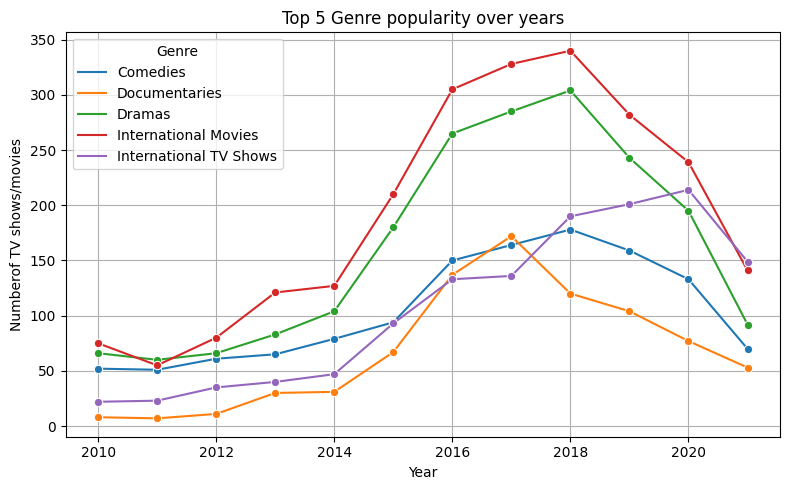

In [79]:
plt.figure(figsize=(8, 5))

sns.lineplot(data=genre_df, x='release_year', y='title', hue='listed_in', marker='o')

plt.title('Top 5 Genre popularity over years')
plt.xlabel('Year')
plt.ylabel('Numberof TV shows/movies')
plt.legend(title='Genre')
plt.grid(True)

plt.tight_layout()
plt.show()

**Insights/Conclusion:** The top five genres in popularity have consistently evolved over the years on Netflix. While the count for 'International Movies' and 'Dramas' surged consistently, 'Comedies' showcased a steady presence. 'International TV Shows' and 'Documentaries' maintained moderate popularity, signifying a diversified content landscape on Netflix.

## Find after how many days the movie will be added to Netflix after the release of the movie.
**Note:** You can consider the recent past data.

In [80]:
df['release_year'].max()  # most recent release_year

2021

In [81]:
# The 'df' dataset is used instead of 'netflix' due to unique 'date_added' values for all titles.
# Unnesting in 'netflix' causes duplicacy in the 'date_added' column.

# Let's filter the df dataset for last 5 years.

df_latest=df[df['release_year'].max()-df['release_year']<=5].copy()
df_latest.shape

(5654, 12)

In [82]:
# Calculate time difference between Date Added and Release Year
df_latest['release_year'] = pd.to_datetime(df_latest['release_year'], format='%Y', errors='coerce')
df_latest['days_to_add'] = (df_latest['date_added'] - df_latest['release_year']).dt.days
df_latest.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,days_to_add
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,2021-09-25,2020-01-01,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",633
1,s2,TV Show,Blood & Water,Unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",266
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown country,2021-09-24,2021-01-01,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,266
3,s4,TV Show,Jailbirds New Orleans,Unknown director,Unknown cast,Unknown country,2021-09-24,2021-01-01,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",266
4,s5,TV Show,Kota Factory,Unknown director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021-01-01,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,266


In [83]:
# Calculate mode of Days_to_Add
mode_days_to_add = df_latest['days_to_add'].mode()[0]
print(f"Mode of days to add after release: {mode_days_to_add} days")

Mode of days to add after release: 334 days


In [84]:
# Let's find the same for different year's range

for i in range(1,11):
  df_latest=df[df['release_year'].max()-df['release_year']<=i].copy()
  df_latest.shape

  # Calculate time difference between Date Added and Release Year
  df_latest['release_year'] = pd.to_datetime(df_latest['release_year'], format='%Y', errors='coerce')
  df_latest['days_to_add'] = (df_latest['date_added'] - df_latest['release_year']).dt.days

  # Calculate mode of Days_to_Add
  mode_days_to_add = df_latest['days_to_add'].mode()[0]
  print(f"For last {i} years, mode of days to add after release: {mode_days_to_add} days")

For last 1 years, mode of days to add after release: 203 days
For last 2 years, mode of days to add after release: 252 days
For last 3 years, mode of days to add after release: 364 days
For last 4 years, mode of days to add after release: 334 days
For last 5 years, mode of days to add after release: 334 days
For last 6 years, mode of days to add after release: 334 days
For last 7 years, mode of days to add after release: 334 days
For last 8 years, mode of days to add after release: 334 days
For last 9 years, mode of days to add after release: 334 days
For last 10 years, mode of days to add after release: 334 days


**Insights/Conclusion:** Over the last decade, the typical duration remains relatively steady at around 334 days, indicating a consistent pattern of release-to-streaming availability for movies on the platform. However, the mode's decline suggests a trend toward quicker availability, potentially reflecting Netflix's evolving strategies to acquire and release content more promptly in recent times.

## Rating of TV shows and movies in Netflix.

In [85]:
rating = df['rating'].value_counts().reset_index()
rating

,index,rating
0,TV-MA,3205
1,TV-14,2157
2,TV-PG,861
3,R,799
4,PG-13,490
5,TV-Y7,333
6,TV-Y,306
7,PG,287
8,TV-G,220
9,NR,79


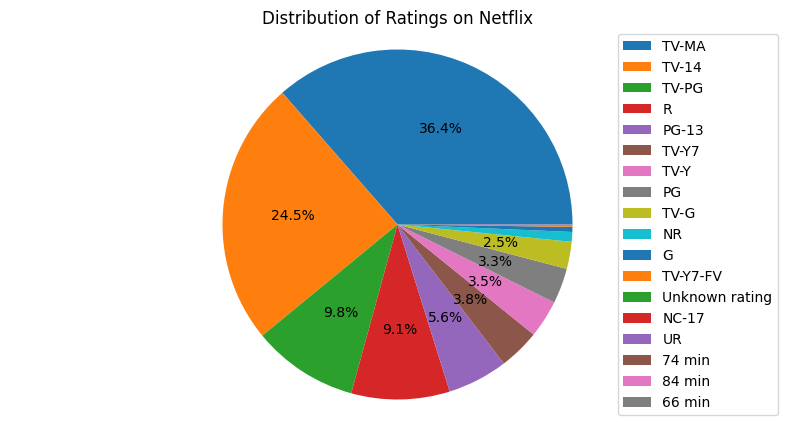

In [86]:
# Graphical Representation

plt.figure(figsize=(10, 5))
plt.title('Distribution of Ratings on Netflix')

# Filter small percentages (here set to not show labels for less than 1%)
def my_autopct(pct):
    return f'{pct:.1f}%' if pct >= 1 else ''

# Create the pie chart
sns.set_palette("pastel")
plt.pie(rating['rating'], autopct=my_autopct, startangle=0, labeldistance=1.1)
plt.axis('equal')
plt.legend(labels=rating['index'],loc="right")

plt.show()

**Insights/Conclusion:** TV-MA dominates at 36.4%, followed by TV-14 at 24.5%. PG-13 and R make up 14.7% and 9.1% respectively. Lesser shares for TV-PG, TV-Y7, and TV-Y show varied content preferences. Netflix's focus on TV-MA content indicates catering to mature audiences, aligning with diverse viewer tastes and content choices.

## Sentiment analysis of Netflix content


`sentiment.polarity` from `TextBlob` in Python quantifies text emotion, spanning from -1 to 1.
* Values near -1 imply negativity, showcasing an unfavorable tone.
* Close to 1 values signify positivity, reflecting a favorable sentiment.
* A 0 suggests neutrality, portraying a lack of distinct positive or negative emotion in the text.

In [87]:
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

df_sentiment=df[['release_year','description']]
df_sentiment.head()

,release_year,description
0,2020,"As her father nears the end of his life, filmm..."
1,2021,"After crossing paths at a party, a Cape Town t..."
2,2021,To protect his family from a powerful drug lor...
3,2021,"Feuds, flirtations and toilet talk go down amo..."
4,2021,In a city of coaching centers known to train I...


In [88]:
for index,row in df_sentiment.iterrows():
    z=row['description']
    testimonial=TextBlob(z)
    p=testimonial.sentiment.polarity
    if p==0:
        sent='Neutral'
    elif p>0:
        sent='Positive'
    else:
        sent='Negative'
    df_sentiment.loc[[index,2],'sentiment']=sent

df_sentiment.head()

<ipython-input-88-c47dbeab4607>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sentiment.loc[[index,2],'sentiment']=sent


,release_year,description,sentiment
0,2020,"As her father nears the end of his life, filmm...",Positive
1,2021,"After crossing paths at a party, a Cape Town t...",Neutral
2,2021,To protect his family from a powerful drug lor...,Negative
3,2021,"Feuds, flirtations and toilet talk go down amo...",Negative
4,2021,In a city of coaching centers known to train I...,Neutral


<Figure size 1000x600 with 0 Axes>

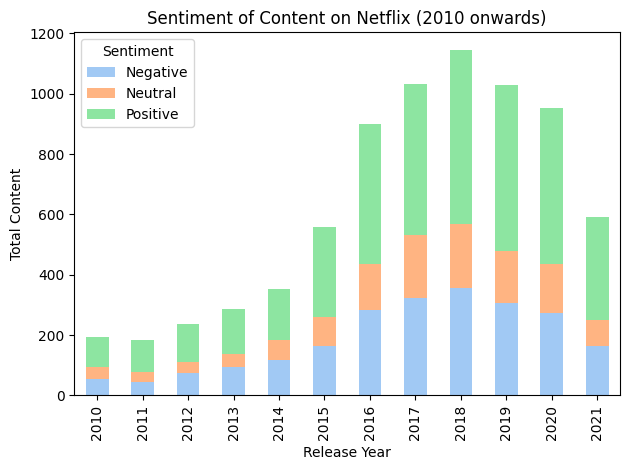

In [89]:
df_sentiment=df_sentiment.groupby(['release_year','sentiment']).size().reset_index(name='total_content')
df_sentiment=df_sentiment[df_sentiment['release_year']>=2010]

pivot_df_sentiment = df_sentiment.pivot(index='release_year', columns='sentiment', values='total_content').fillna(0)

plt.figure(figsize=(10, 6))
pivot_df_sentiment.plot(kind='bar', stacked=True)

plt.title('Sentiment of Content on Netflix (2010 onwards)')
plt.xlabel('Release Year')
plt.ylabel('Total Content')
plt.legend(title='Sentiment')

plt.tight_layout()
plt.show()

**Insights/Conclusion:** Looking at sentiment counts across years, Netflix content has seen substantial growth. Positive sentiments consistently dominate, showing a rising trend. Negative and neutral sentiments also surged but with lesser intensity. The years 2018 and 2019 mark a peak in diverse sentiments, indicating a broader emotional spectrum in Netflix descriptions, aligning with its expansive content library's evolution.

## Recommendations


**1. Content Diversification:** Invest in producing a broader range of international movies and TV shows to cater to a global audience. Explore diverse genres like dramas, comedies, and documentaries to expand content offerings.


**2. Timely Release Strategies:** Optimize release timings, especially in the peak months of July and December, to capture increased viewer engagement. Target premieres during weeks 39 and 26 for maximum viewership potential.


**3. Directorial and Acting Talent:** Collaborate with prolific directors like Rajiv Chilaka and Jan Suter and renowned actors like Anupam Kher and Shah Rukh Khan to attract a diverse audience and enhance content quality.


**4. Embrace Positive Sentiments:** Create descriptions that lean towards positive sentiments to engage viewers emotionally. Highlight uplifting aspects of content to resonate positively with potential audiences.

**5. Strategic Rating Allocation:** Invest in more TV-MA content while balancing other ratings to cater to diverse audience preferences. Strategically align content to meet the demands of both mature viewers and wider demographics.

**6. Content Release Window Optimization:** Focus on shorter release-to-streaming durations to keep up with evolving viewer expectations and potentially improve user retention and engagement.

**7. Continued Genre Exploration:** Explore and invest in emerging genres like action-adventure and global dramas to capitalize on growing viewer interest in these areas.